# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


## Unsupervised - Raw Data
### KMeans

In [3]:
## Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='raw', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([4983, 3633, 8676, ..., 2551, 8221, 3690])},
 {'KMeans': array([7323, 6804, 7500, ..., 2422, 4719, 7789])}]

### Spectral Clustering

In [4]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral', data_type='raw', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['Spectral'], train_type=3)

[{'KMeans': array([4983, 3633, 8676, ..., 2551, 8221, 3690]),
  'Spectral': array([5752, 4658, 4898, ..., 7287, 2093, 8028])},
 {'KMeans': array([7323, 6804, 7500, ..., 2422, 4719, 7789]),
  'Spectral': array([4561,  667, 3773, ..., 8044, 4399,  438])}]

### Train and Compare Unsupervised Models

KMeans:
              precision    recall  f1-score   support

         neg       0.90      0.99      0.94      7539
         pos       0.91      0.33      0.48      1273

    accuracy                           0.90      8812
   macro avg       0.90      0.66      0.71      8812
weighted avg       0.90      0.90      0.88      8812



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral:
              precision    recall  f1-score   support

         neg       1.00      0.83      0.91      7539
         pos       0.49      0.98      0.66      1273

    accuracy                           0.85      8812
   macro avg       0.75      0.91      0.78      8812
weighted avg       0.92      0.85      0.87      8812

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.8409090909090909
False Positives Account for 4.68% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 26.767857142857142
Average RAF: 0.038114119
Average MPR: 17.082191849642857
Average MS: 1344.5892857142858
Correctly Classified FP Characteristics:
Average Time to Threshold: 36.38882882882883
Average RAF: 0.03329371095045045
Average MPR: 6.669250199738738
Average MS: 516.2713963963964


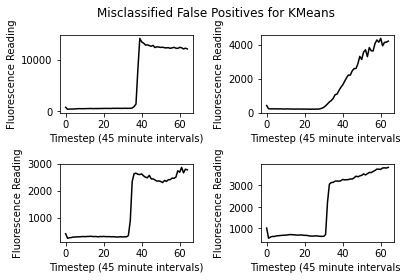

-------- Results on False Positives for Spectral --------


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Accuracy on False Positives: 0.13636363636363635
False Positives Account for 8.83% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.65491228070175
Average RAF: 0.035203193166666674
Average MPR: 9.059469673004386
Average MS: 719.108552631579
Correctly Classified FP Characteristics:
Average Time to Threshold: 42.479166666666664
Average RAF: 0.026824132972222223
Average MPR: 3.679625460611111
Average MS: 198.00694444444446


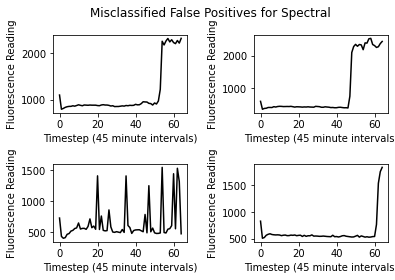

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941086, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 10.765146606306365, Max: 56.55471698
MS:
	Min: 48.75, Average: 841.158483896308, Max: 5967.75


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


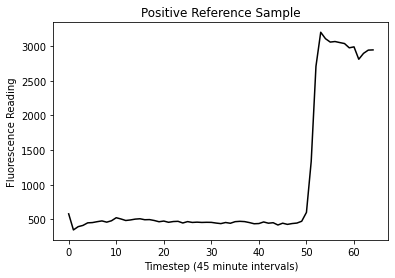

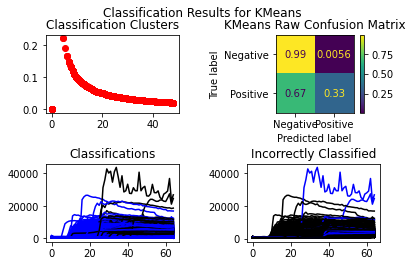

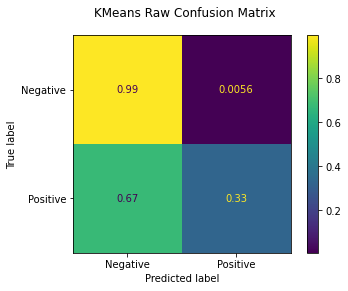

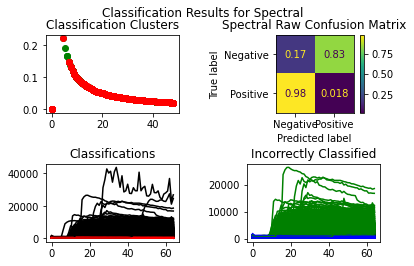

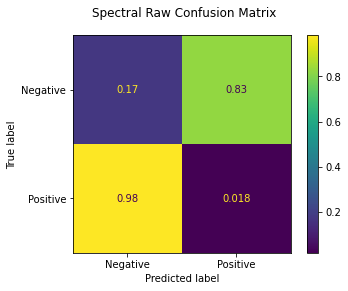

In [5]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

## Supervised - Raw Data

### Multilayer Perceptron

In [6]:
## MLP
from Models import MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), file_path='../SavedModels/Raw/'), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [7]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(file_path='../SavedModels/Raw/'), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [8]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

28/28 [==============================] - 0s 919us/step
MLP:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.99       745
         pos       0.87      1.00      0.93       136

    accuracy                           0.98       881
   macro avg       0.94      0.99      0.96       881
weighted avg       0.98      0.98      0.98       881

SVM:
              precision    recall  f1-score   support

         neg       1.00      0.98      0.99       745
         pos       0.88      0.99      0.93       136

    accuracy                           0.98       881
   macro avg       0.94      0.98      0.96       881
weighted avg       0.98      0.98      0.98       881

-------- Results on False Positives for MLP --------
28/28 [==============================] - 0s 773us/step
Accuracy on False Positives: 0.23076923076923078
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold

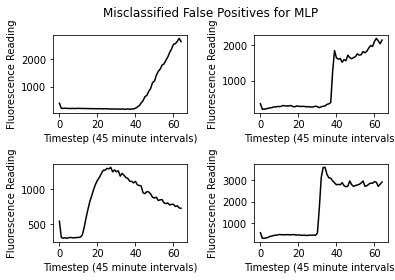

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.3076923076923077
False Positives Account for 90.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 32.666666666666664
Average RAF: 0.03230416472222222
Average MPR: 8.41608483561111
Average MS: 563.5277777777778
Correctly Classified FP Characteristics:
Average Time to Threshold: 32.625
Average RAF: 0.04426085375
Average MPR: 3.965391643875
Average MS: 206.5


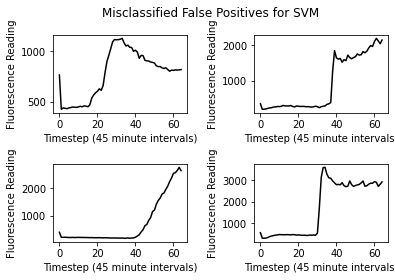

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941086, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 10.765146606306365, Max: 56.55471698
MS:
	Min: 48.75, Average: 841.158483896308, Max: 5967.75
28/28 [==============================] - 0s 2ms/step


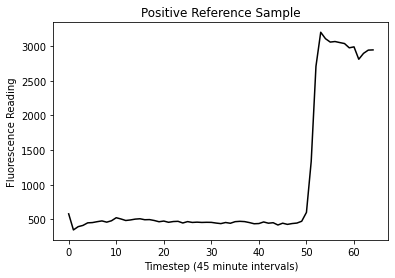

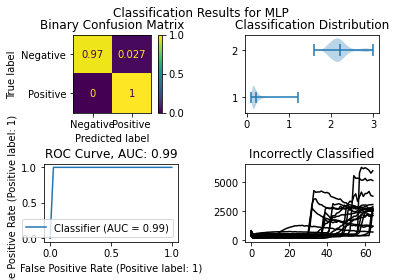

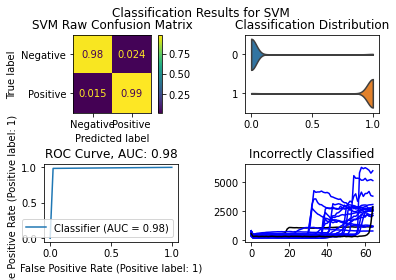

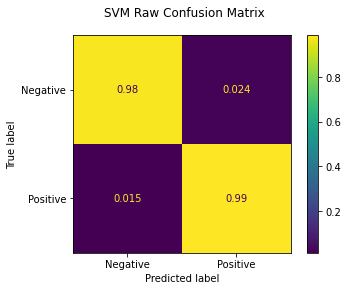

In [9]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Timestep')

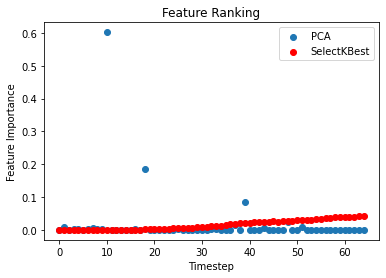

In [10]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)), features)
plt.scatter(np.arange(len(features)), skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Timestep')

## Unsupervised - Analysis

### Create New Object

In [11]:
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [12]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([ 103, 5013, 4279, ..., 2571, 5374, 4910])},
 {'KMeans': array([6881, 5334, 3242, ...,   16, 3739, 8549])}]

### Add Spectral Clustering

In [13]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['Spectral'], train_type=3)

[{'KMeans': array([ 103, 5013, 4279, ..., 2571, 5374, 4910]),
  'Spectral': array([ 479, 7465, 5664, ..., 5247, 7832, 7550])},
 {'KMeans': array([6881, 5334, 3242, ...,   16, 3739, 8549]),
  'Spectral': array([2577, 2788, 7181, ...,  491, 4424, 3888])}]

### Train and Compare Unsupervised Models

In [14]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

KMeans:
              precision    recall  f1-score   support

         neg       0.92      1.00      0.95      7539
         pos       0.94      0.47      0.62      1273

    accuracy                           0.92      8812
   macro avg       0.93      0.73      0.79      8812
weighted avg       0.92      0.92      0.91      8812



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

### Add Supervised Learning Technique (SVM)

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'analysis', tag = 'Supervised')

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

SVM:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98       741
         pos       0.85      0.98      0.91       140

    accuracy                           0.97       881
   macro avg       0.92      0.97      0.94       881
weighted avg       0.97      0.97      0.97       881

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.13793103448275862
False Positives Account for 89.29% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 32.1
Average RAF: 0.0342731104
Average MPR: 8.03088029768
Average MS: 693.93
Correctly Classified FP Characteristics:
Average Time to Threshold: 45.75
Average RAF: 0.02196585
Average MPR: 4.105696572
Average MS: 130.1875


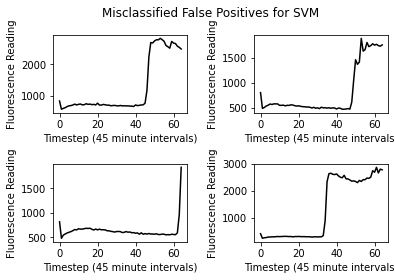

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941086, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 10.765146606306365, Max: 56.55471698
MS:
	Min: 48.75, Average: 841.158483896308, Max: 5967.75


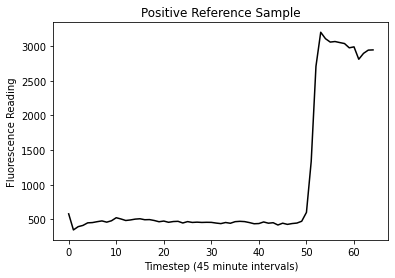

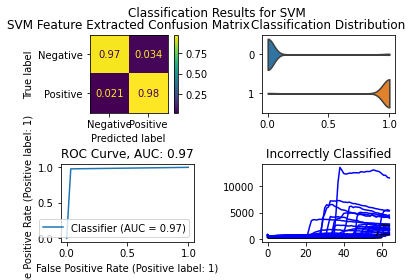

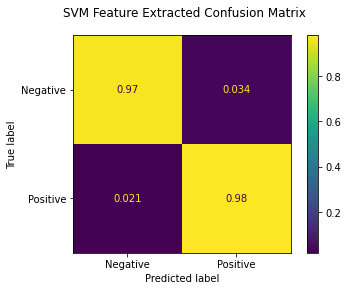

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

In [ ]:
# import pickle
# with open('../svm.pkl', 'wb') as f:
#     pickle.dump(ml_quic.models['SVM'].model, f)

# ml_quic.models['MLP'].model.save('../MLP2.keras')
# ml_quic.models['MLP'].model.save('../MLP2.h5')